# Numerical Ordinary Differential Equations and Applications
## Computer Project Assignment CP2: Disease outbreak

D. J. Higham and H. Yorston, 
School of Mathematics, University of Edinburgh, 2022


Anabel Yong, s1911568

In this second computer assignment we will investigate ODE models for the spread of disease using a built-in Python function. This is a template Jupyter notebook that (i) gets you started and (ii) sets the **six tasks** that make up the assignment.  

In order to complete the assigment, you must perform the six tasks by editing and/or adding further content to **this notebook**. 

Any figure that you produce should have labeled axes, a title, and where appropriate, a legend to distinguish between plots. 

To submit your completed work
  (a) create a pdf version of the notebook when all cells have been run (on a Mac/Safari system this may be done via "File", "Print Preview" and "Export as PDF"),
  (b) submit **both the .ipynb and .pdf versions** electronically on **Gradescope**.
Hence, you are asked to submit two files: a Jupyter notebook and the corresponding pdf version. If there is any inconsistency between the two files, we will regard the .ipynb version as your definitive submission. *Make sure that your name is clearly indicated at the top of notebook*.

The deadline is **midday on Friday 25th March** and, as for all continuous assessment in this course, standard University of Edinburgh penalties apply for late submission without an authorised extension. 

### Background: modelling the spread of an infectious disease

The mathematical modelling of infectious diseases is an important and well-studied area that is currently of particular interest. A simple, but seminal, idea in this field is the Susceptible, Infectious, Recovered (SIR) compartmental model of Kermack and McKendrick [1]; see also (https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology). 
In this model, the population splits into three disjoint compartments. At time $t$, we denote the number of  *susceptible* individuals by $S(t)$. These people do not have the disease, but are vulnerable to infection.  We let $I(t)$ denote the number of individuals who have the disease at time $t$; this is the *infected* category. Finally, $R(t)$ denotes the number who have *recovered* from the disease, and are no longer infected nor susceptible (this category could also include deaths from the disease and individuals with immunity). SIR-type models assume that the society in which the disease spreads is homogeneous, finite and closed, i.e. all individuals are equally likely to become infected and recover, and there are no migrations to or from other societies. These models are relevant for diseases such as influenza (flu), measles, mumps and rubella.

Our SIR model is given by an ODE of the form 
\begin{eqnarray*}
\frac{dS}{dt} &=& - \beta  SI \\
\frac{dI}{dt} &=& \beta S  I - \gamma  I\\
\frac{dR}{dt} &=& \gamma I.
\end{eqnarray*}

In this model, $\beta$  and $\gamma$ are nonnegative parameters. 
To justify the model, we can argue that infection takes place when a susceptible individual intreracts with an infectious individual. Hence, the rate at which susceptible people become infected, $dS/dt$, is proportional to the current levels of both susceptible and infected people.
So $\beta$ quantifies the infectiousness of the disease, and 
$dS/dt = - \beta  SI$.
Similarly, the $\beta  SI$ expression affects $dI/dt$ positively, since a new infection event increases $I(t)$. 

We also assume that infected people recover at a rate determined by the constant $\gamma$.
So $dI/dt$ is affected negatively by $\gamma  I$ and 
$dR/dt$ is affected positively by $\gamma  I$.

[1] Kermack W.O., McKendrick A.G. 1927). "A Contribution to the Mathematical Theory of Epidemics". Proceedings of the Royal Society A. 115 (772): 700–721

### Using solve_ivp 
This computer project assignment requires you to use the built-in ODE solver solve_ivp. In the code cell below there is a fully worked example. We also make use of *partial*, which allows us to fix some of a function's arguments. 

The solve_ivp command is available within the scipy.integrate library of routines. Instructions can be found at https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html 

Although it is instructive to implement methods from scratch, as in Computer Assignment 1, for larger-scale simulations it is advisable to use the built-in ODE solving software that is typically available in scientific computing packages. Hence, a key objective in this assignment is to gain experience with solve_ivp. There is a range of numerical methods available within solve_ivp. We will just use the default method (an explicit Runge--Kutta method of order 5, with an accompanying Runge--Kutta method of 4 to help monitor the error). We will also use the default relative and absolute error tolerances.       

In [47]:
# Import the required modules
import numpy as np                # scientific library

import matplotlib.pyplot as plt   # for creating plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # improve resolution

from scipy.integrate import solve_ivp # numerical solver of odes
from functools import partial # allows us to define partial functions

## Application: Flu spreading around a submarine crew

We will apply the SIR ODE model above to study an outbreak of the flu among the 50 crew members in a submarine. This is a sensible applciation beacuse the model is relevant for a small closed society.
Note that **time will be measured in units of hours throughout this assignment.**

To choose the parameter values, suppose we have data from a similar vessel where the spread of the disease has already been monitored. In that other vessel, it was observed  that in
the beginning of a day there were 45 susceptibles and 5 infected, while the numbers
were 35 and 15, respectively, 24 hours later. Among 15 infected, it was observed that
5 recovered during a day. 

Based on the data that we have been given, it is reasonable to take 
$\beta=10/(45*5*24)$ and $\gamma=5/(15*24)$.

In the code below, we use these parameters in the case where there is 1 infected crew member initially and 49 susceptible crew members. We use the built-in ODE solver solve_ivp to simulate the system of equations numerically over a time interval of 720 hours. We plot the number of individuals in each category as a function of time.


In [48]:
# We first need to define a function that returns the RHS of the ODEs given time,
# variables and parameter values.

def SIR_eqs(t, y, beta, gamma): # define function of time, y and model parameters: t is not used until Task 5
    S, I, R = y # specify variables
    dydt= np.empty(len(y)) # create empty vector and then fill entries with the corresponding RHS
    #ODE equations 
    dydt[0]= -beta*S*I  
    dydt[1]= beta*S*I -gamma*I
    dydt[2]=gamma*I

    return dydt # the function will return the value of the ODE RHS


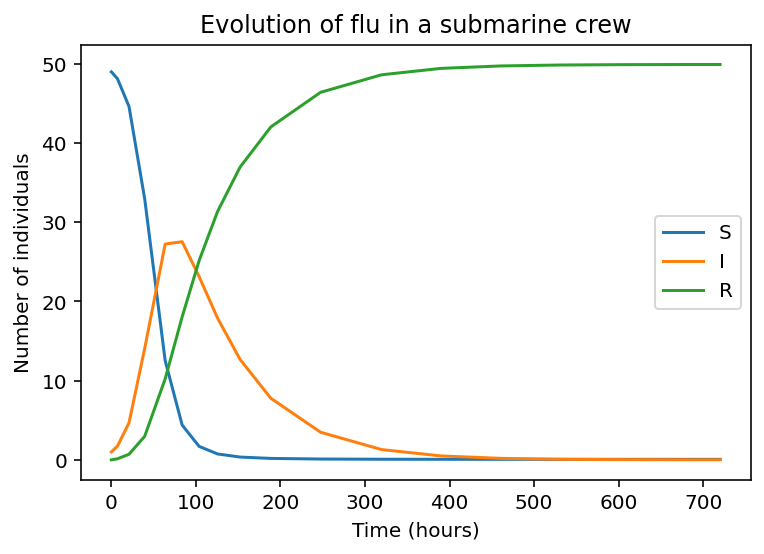

In [49]:
## Evolution of flu in a submarine crew

# Create an array with the initial conditions
y0=np.array([49,1,0])    # 49 susceptible, 1 infected, 0 recovered 

# Create a partial version of the equations function specifying the parameter values
eqs1 = partial(SIR_eqs, beta=10./(45*5*24), gamma=5./(15*24))

# Use solve_ivp to simulate the ODE with the specified parameter
# values, initial conditions (y0), and simulate up to 720 hours. 
# Use the default method and accuracy tolerance.

sol = solve_ivp(eqs1, [0,720], y0,dense_output=True) #range of time given to observe, 720 hours.

# Plot solution
plt.figure(1)
plt.plot(sol.t, sol.y[0],label='S') #plot according to the ODEs given above, S, I, R respectively 
plt.plot(sol.t, sol.y[1],label='I')
plt.plot(sol.t, sol.y[2],label='R')

# Label axis
plt.xlabel('Time (hours)')
plt.ylabel('Number of individuals')

# Create a title and a legend
plt.title('Evolution of flu in a submarine crew')
plt.legend()
plt.show()        

# Task 1: Examining the output
[2 marks]

By adding some extra code at the end of the example above, report the following.
(Note that humans are measured using whole numbers, so in some cases below you will need to round to the nearest integer.) 

(a) the total number of individuals at the final time $T =720$ hours who are either currently infected or have been infected during this outbreak,  

(b) the maximum number of individuals simultaneously infected at any time $t$ during the outbreak,

(c) the time $t$ (in hours) at which the maximum in part (b) occurs.

[You may find it helpful to use the Python functions max and argmax.]

Brief report on (a), (b), (c) here, based on results from code.

In [50]:
# ADD EXTRA CODE FOR TASK 1 HERE
#a) 
print('a) Total number of individuals at the final time  𝑇=720  hours who are either ' 
'currently infected or have been infected during this outbreak is', round(50-sol.y[0][-1]))


#b)
print('b) The maximum number of individuals simultaneously infected at any time 𝑡 during the outbreak is',
round(np.amax(sol.y[1])))

#print(round(np.amax(sol.y[1])))
          
#c) 
maximum=np.argmax(sol.y[1])
print('c) The time 𝑡 (in hours) at which the maximum in part (b) occurs) is ', sol.t[maximum])

a) Total number of individuals at the final time  𝑇=720  hours who are either currently infected or have been infected during this outbreak is 50
b) The maximum number of individuals simultaneously infected at any time 𝑡 during the outbreak is 28
c) The time 𝑡 (in hours) at which the maximum in part (b) occurs) is  83.7468387063945


# Task 2: Handwashing campaign
[3 marks]

Suppose now that a “wash your hands” campaign was launched at time zero, having the effect of reducing the infectiousness parameter $\beta$ by a factor of $1/5$. Repeat the calculation above with this change. Plot the same graph as before for this new scenario, but up to time $T = 1,440$ hours. Report the new values corresponding to (a), (b) and (c) in Task 1, and briefly comment on the effect of the campaign. 


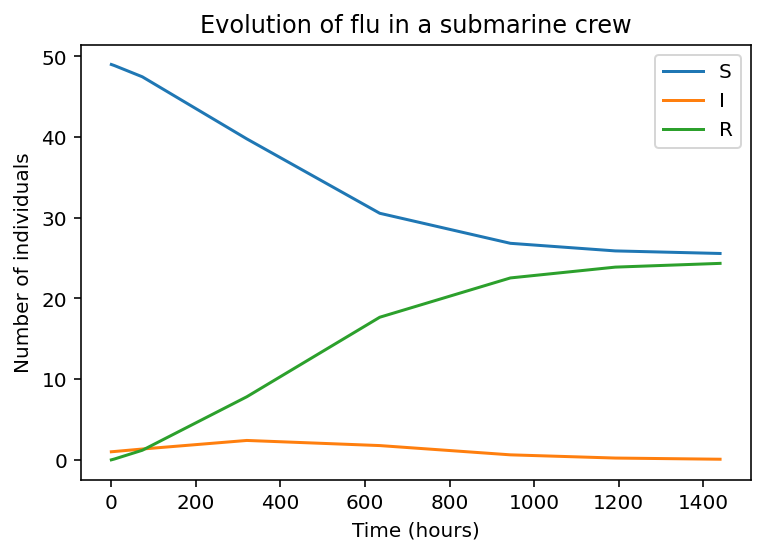

a) Total number of individuals at the final time  𝑇=720  hours who are either currently infected or have been infected during this outbreak is  24
b) The maximum number of individuals simultaneously infected at any time  𝑡  during the outbreak is  2
c) The time  𝑡  (in hours) at which the maximum in part (b) occurs) is  320.4546398258759


In [51]:
## Evolution of flu in a submarine crew

# Create an array with the initial conditions
y0=np.array([49,1,0])    # 49 susceptible, 1 infected, 0 recovered 

# Create a partial version of the equations function specifying the parameter values
eqs1 = partial(SIR_eqs, beta=2./(45*5*24), gamma=5./(15*24))

# Use solve_ivp to simulate the ODE with the specified parameter
# values, initial conditions (y0), and simulate up to 1440 hours. 
# Use the default method and accuracy tolerance.

sol = solve_ivp(eqs1, [0,1440], y0,dense_output=True) #new scenario where range of time is extended to 1440 hours. 

# Plot solution
plt.figure(1)
plt.plot(sol.t, sol.y[0],label='S') #plot according to the ODEs given above, S, I, R respectively
plt.plot(sol.t, sol.y[1],label='I')
plt.plot(sol.t, sol.y[2],label='R')

# Label axis
plt.xlabel('Time (hours)')
plt.ylabel('Number of individuals')

# Create a title and a legend
plt.title('Evolution of flu in a submarine crew')
plt.legend()
plt.show() 

# ADD EXTRA CODE FOR TASK 2 HERE
#a) 
print('a) Total number of individuals at the final time  𝑇=720  hours who are either currently infected or ' 
'have been infected during this outbreak is ',round(50-sol.y[0][-1]))

#b)
print('b) The maximum number of individuals simultaneously infected at any time  𝑡  during the outbreak is ', 
round(np.amax(sol.y[1])))
          
#c) 
maximum=np.argmax(sol.y[1])
print('c) The time  𝑡  (in hours) at which the maximum in part (b) occurs) is ', sol.t[maximum])

Brief report on (a), (b), (c) here, based on results from code, and comparison with answers from Task 1.

Comparison (Task 1 & Task 2):
(a) From Task 1, total number of individuals at 720 hours who are either currently infected/ have been infected is higher than the number of individuals when handwashing campaign was launched (in Task 2). 
(b) Maximum numebr of individuals simultaneously infected is higher in Task 1 than in Task 2. 
(c) From Task 2, time at which maximum in part (b) occurs is 320.45 hours which is 236.7 hours longer than in Task 1. 

# Task 3: Outbreak or not
[3 marks]

For the number of infected individuals $I$ to increase, the rate of change $\frac{dI}{dt}$ must be positive. From the form of the SIR ODE system, we see that this corresponds to $\beta S  I - \gamma I > 0$. 

Hence initially, at time $t = 0$, the infected group of individuals starts to grow when 
$$\beta S(0)  I(0) - \gamma I(0) >0. $$
In our case, we have $I(0) = 1$ infected individual and $S(0) = 49$ susceptibles, and this inequality becomes  
$$\frac{\beta 49}{\gamma}>1.$$

Hence, if we think of $\gamma=5/(15*24)$ as fixed, it is reasonable to expect that the disease will not take hold if $\beta < \beta^\star$, where 
$$
\beta^\star = \frac{\gamma}{49} \approx 2.8 \times {10}^{-4}.
$$

This argument is not rigorous, because it is relevant only for short time periods.

By simulating the ODE over 1000 hours using $\gamma=5/(15*24)$ and the same initial conditions as above, and examining the peak infection level for various choices of $\beta$, produce a plot that indicates whether the inequality $\beta < \beta^\star$ can be used to predict whether an outbreak will occur.
Write a brief summary (one or two sentences) giving your conclusion.

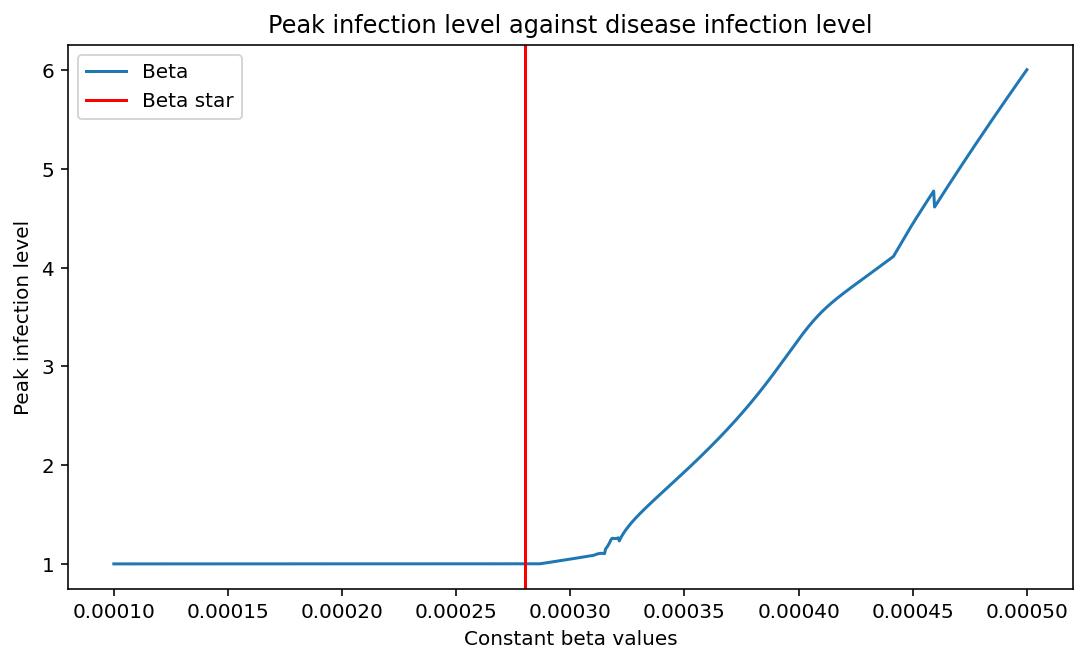

In [52]:
## Evolution of flu in a submarine crew

# Create an array with the initial conditions
y0=np.array([49,1,0])    # 49 susceptible, 1 infected, 0 recovered 

BETA=[b*1e-4 for b in np.linspace(1, 5, 1000)] #iteration of 1000 points; range of beta in 1<beta<5
infection_level=[] #empty list 
beta_star=2.8*10**(-4) #constant provided from Task 3

for beta in BETA: #for loop created
# Create a partial version of the equations function specifying the parameter values given in Task 3
    eqs1 = partial(SIR_eqs,beta=beta, gamma=5./(15*24))    
# Use solve_ivp to simulate the ODE with the specified parameter
# values, initial conditions (y0), and simulate up to 1000 hours. 
# Use the default method and accuracy tolerance.
    sol = solve_ivp(eqs1, [0,1000], y0,dense_output=True) 
    maximum_infec=max(sol.y[1]) 
    infection_level.append(maximum_infec)
    
# Label axis
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
plt.xlabel('Constant beta values')
plt.ylabel('Peak infection level')
plt.plot(BETA, infection_level, label="Beta")
plt.axvline(x=beta_star, color='r', label="Beta star")

# Create a title and a legend
plt.title('Peak infection level against disease infection level')
plt.legend()
plt.show() 

Brief summary and conclusion goes here.

From graph above, red line annotates where beta star value is approximately 2.8*10**(-4), whereas blue line shows the different values of beta as compared to the red line. This graph concludes that beyond the beta_star value, the peak infection level increases, whereas the values lower than beta_star, peak infection level is constant at 1. Therefore, it is true that disease will not hold at beta lower than beta_star with gamma parameters.

# Task 4: Time restricted immunity
[4 marks]

We will now assume that immunity after the disease does not last indefinitely. 
This implies that *recovered* individuals may become *susceptible* again. 
We will suppose that loss of immunity (i.e., moving from category R to S) 
happens at a rate that is proportional to the number of recovered individuals. 
Let $\mu$ denote the relevant rate constant.

The new SIR model is then given by the following equations:

\begin{eqnarray*}
\frac{dS}{dt} &=& - \beta  SI + \mu R\\
\frac{dI}{dt} &=& \beta S  I - \gamma  I\\
\frac{dR}{dt} &=& \gamma I - \mu R.\\
\end{eqnarray*}

Note that $\mu$ is a nonnegative parameter such that that $\mu^{-1}$ gives the typical amount of time it takes to lose immunity.



Suppose that the typical time to lose immunity is 30 days.
So $\mu = 1/(30*24)$. Solve the ODE for $\gamma =0.008$, $\beta=0.0003$ and the same initial conditons as above,
and plot the evolution of the three categories over 300 days. 

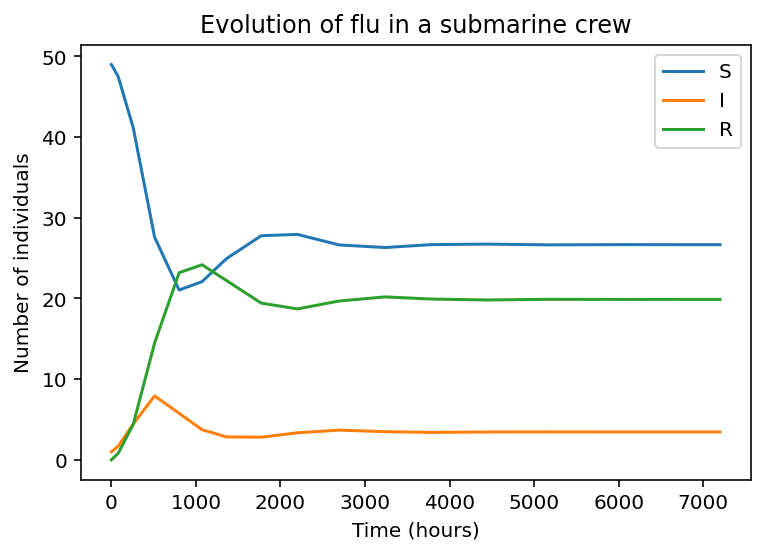

In [53]:
## Task 4
## code for the new ODE function goes here
## Evolution of flu in a submarine crew

def SIR_eqs(t, y, mu, beta, gamma): # define function of time, y and model parameters: t is not used until Task 5
    S, I, R = y # specify variables
    dydt= np.empty(len(y)) # create empty vector and then fill entries with the corresponding RHS
    dydt[0]= -beta*S*I+mu*R
    dydt[1]= beta*S*I -gamma*I
    dydt[2]=gamma*I-mu*R

    return dydt # the function will return the value of the ODE RHS


# Create an array with the initial conditions
y0=np.array([49,1,0])    # 49 susceptible, 1 infected, 0 recovered 

# Create a partial version of the equations function specifying the parameter values
eqs1 = partial(SIR_eqs, beta=0.0003, gamma=0.008, mu=1/(30*24))

# Use solve_ivp to simulate the ODE with the specified parameter
# values, initial conditions (y0), and simulate up to 300*24, which is 7200 hours. 
# Use the default method and accuracy tolerance.

sol = solve_ivp(eqs1, [0,300*24], y0,dense_output=True)

# Plot solution
plt.figure(1)
plt.plot(sol.t, sol.y[0],label='S') #plot according to the ODEs given above, S, I, R respectively
plt.plot(sol.t, sol.y[1],label='I')
plt.plot(sol.t, sol.y[2],label='R')

# Label axis
plt.xlabel('Time (hours)')
plt.ylabel('Number of individuals')

# Create a title and a legend
plt.title('Evolution of flu in a submarine crew')
plt.legend()
plt.show() 


# Task 5: Incorporating vaccination
[4 marks]

Imagine that the on board medical officer launches a vaccination campaign
that starts on day 5 of the outbreak and finishes at the end of day 15. 

We may introduce a category V for individuals who have received immunity through vaccination.
We will assume that at any time during the vaccination phase, any susceptible individual has a 
fixed chance of receiving an effective vaccination.

The new, extended, ODE system becomes 
\begin{eqnarray*}
\frac{dS}{dt} &=& - \beta  SI + \mu R -p(t) S\\
\frac{dV}{dt} &=& p(t) S\\
\frac{dI}{dt} &=& \beta S  I - \gamma  I\\
\frac{dR}{dt} &=& \gamma I - \mu R.\\
\end{eqnarray*}

Here, $p(t)$ is defined by 

$$p(t)=
\left\{
\begin{array}{ll}
p  & \mbox{if } 5·24 \leq t \leq 15·24  \\
0 & \mbox{otherwise }
\end{array}
\right.$$

where $p$ is a constant that quantifies the effectiveness of the vaccination campaign.
Note that we must multiply the $t$ value by 24 because, throughout this assignment, $t$ is measured in hours, not
days. 


With all other parameters as in Task 4, solve this ODE model for the case 
$p=0.005$ and plot the evolution of the four categories over 100 days.


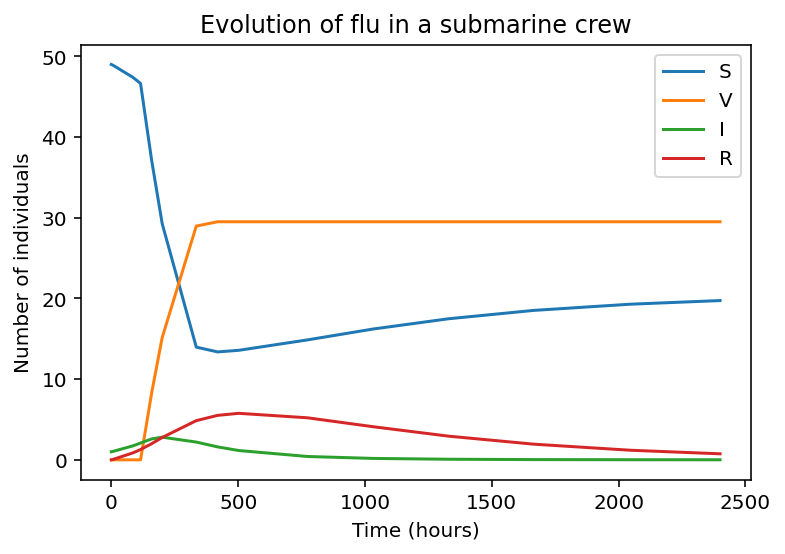

In [54]:
def SIR_eqs(t, y, beta, gamma, mu): # define function of time, y and model parameters: t is not used until Task 5
    S, V, I, R = y # specify variables
    if 5*24<=t<=15*24:
        dydt= np.empty(len(y)) # create empty vector and then fill entries with the corresponding RHS
        dydt[0]= -beta*S*I+mu*R-0.005*S
        dydt[1]= 0.005*S
        dydt[2]=beta*S*I-gamma*I
        dydt[3]=gamma*I-mu*R
    
    else:  
        dydt= np.empty(len(y)) # create empty vector and then fill entries with the corresponding RHS
        dydt[0]= -beta*S*I+mu*R
        dydt[1]=0
        dydt[2]=beta*S*I -gamma*I
        dydt[3]=gamma*I-mu*R
        

    return dydt # the function will return the value of the ODE RHS


# Create an array with the initial conditions
y0=np.array([49,0,1,0])    # 49 susceptible, 1 infected, 0 recovered 

# Create a partial version of the equations function specifying the parameter values
eqs1 = partial(SIR_eqs, beta=0.0003, gamma=0.008, mu=1/(30*24))

# Use solve_ivp to simulate the ODE with the specified parameter
# values, initial conditions (y0), and simulate up to 100 days (100*24 hours)
# Use the default method and accuracy tolerance.

sol = solve_ivp(eqs1, [0,100*24], y0,dense_output=True)

# Plot solution
plt.figure(1)
plt.plot(sol.t, sol.y[0],label='S') #plot according to the ODEs given above, S, V, I, R respectively
plt.plot(sol.t, sol.y[1],label='V')
plt.plot(sol.t, sol.y[2],label='I')
plt.plot(sol.t, sol.y[3],label='R')

# Label axis
plt.xlabel('Time (hours)')
plt.ylabel('Number of individuals')

# Create a title and a legend
plt.title('Evolution of flu in a submarine crew')
plt.legend()
plt.show() 


# Task 6
[4 marks]

All the models in this assignment have the property that, for any initial condition, the sum of the solution components is constant for all time. This makes sense, because the total population is not changing---individuals are moving between compartments.

Let's focus on the ODE in Task 5:
\begin{eqnarray*}
\frac{dS}{dt} &=& - \beta  SI + \mu R -p(t) S\\
\frac{dV}{dt} &=& p(t) S\\
\frac{dI}{dt} &=& \beta S  I - \gamma  I\\
\frac{dR}{dt} &=& \gamma I - \mu R.\\
\end{eqnarray*}

Summing these components we have
$$
\frac{d(S+V+I+R)}{dt} = 0,
$$
which confirms that the sum $S(t) + V(t) + I(t) + R(t)$ remains constant for all time.


Show that Euler's method on this ODE, **for any stepsize $h>0$**, produces
a numerical solution that is guaranteed to **exactly** preserve the sum over the four components at every time point.

 Use the Markdown cell below to give your answer.
[*Note that this task is not asking you to write any Python code. A few sentences involving some mathematics is required.*]



Answer goes here in this Markdown cell.

Annotating $S=a_n; V=b_n; I=c_n; R=d_n$ where this forms a matrix, 
$$
X=
\begin{bmatrix}
a_n \\
b_n \\
c_n \\
d_n
\end{bmatrix}
$$
With Euler's method below, 

$$y_{n+1}=y_n+hf(t_n, y_n)$$

Therefore,
$$a_{n+1}=a_n+h(\beta a_nc_n+\mu d_n+p(t)a_n)$$
$$b_{n+1}=b_n+h(p(t)a_n)$$
$$c_{n+1}=c_n+h(\beta a_nc_n-\gamma c_n)$$
$$d_{n+1}=d_n+h(\gamma c_n-\mu d_n)$$

where this observation can be made, for any stepsize $h>0$:

$$a_{n+1}+b_{n+1}+c_{n+1}+d_{n+1}=a_n+b_n+c_n+d_n$$

With Euler's method on this ODE, it produces a numerical solution that exactly preserves the sum over the 4 components at every time point.